# Introduction to NLP Fundamentals in TensorFlow

## Check for GPU

In [1]:
!nvidia-smi -L


GPU 0: Tesla T4 (UUID: GPU-c79050e0-f855-5d5f-7836-3640a0538cac)


## Get helper functions

In [2]:
!wget https://raw.githubusercontent.com/yacin-hamdi/deep_learning/master/tensorflow/helper_functions.py

--2024-02-16 16:34:10--  https://raw.githubusercontent.com/yacin-hamdi/deep_learning/master/tensorflow/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2024-02-16 16:34:10 (101 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [3]:
from helper_functions import *

## Get a text dataset

In [4]:
!wget https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip

--2024-02-16 16:34:15--  https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.174.207, 64.233.188.207, 64.233.189.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.174.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 607343 (593K) [application/zip]
Saving to: ‘nlp_getting_started.zip’

nlp_getting_started 100%[===================>] 593.11K   993KB/s    in 0.6s    

2024-02-16 16:34:16 (993 KB/s) - ‘nlp_getting_started.zip’ saved [607343/607343]



In [5]:
unzip_data("nlp_getting_started.zip")

## Visualizing a text dataset

In [6]:
import pandas as pd
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

In [7]:
train_df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [8]:
# shuffle training dataframe
train_df_shuffled = train_df.sample(frac=1, random_state=42)
train_df_shuffled.head()

,id,keyword,location,text,target
2644,3796,destruction,NaN,So you have a new weapon that can cause un-ima...,1
2227,3185,deluge,NaN,The f$&amp;@ing things I do for #GISHWHES Just...,0
5448,7769,police,UK,DT @georgegalloway: RT @Galloway4Mayor: ÛÏThe...,1
132,191,aftershock,NaN,Aftershock back to school kick off was great. ...,0
6845,9810,trauma,"Montgomery County, MD",in response to trauma Children of Addicts deve...,0


In [9]:
test_df.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [10]:
train_df.target.value_counts()

0    4342
1    3271
Name: target, dtype: int64

In [11]:
# total number of samples
len(train_df), len(test_df)

(7613, 3263)

In [12]:
# visualize some random training examples
import random
random_index = random.randint(0, len(train_df)-5)
for row in train_df_shuffled[["text", "target"]][random_index:random_index+5].itertuples():
  _, text, target = row
  print(f'target:{target}', "(real disaster)" if target > 0 else "(not real disater)")
  print(f'test:\n{text}')
  print("----\n")

target:0 (not real disater)
test:
MEN CRUSH EVERY FUCKING DAY???????????????????????????? http://t.co/Fs4y1c9mNf
----

target:0 (not real disater)
test:
@EmiiliexIrwin Totally agree.She is 23 and know what birth control is.I am not saying it is true. want to derail their plan of blaming fans.
----

target:0 (not real disater)
test:
Head on head collision Ima problem and nobody can solve em on Long division
----

target:0 (not real disater)
test:
Hey @reddit - the concept of a 'quarantine' makes no sense if the people you've quarantined can just wander out &amp; about whenever they want
----

target:1 (real disaster)
test:
Richard returns after whirlwind few days http://t.co/L8W30WFW3R #MLB
----



### Split data into training and validation sets

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
train_sentences, val_sentences, train_labels, val_labels = train_test_split(train_df_shuffled['text'].to_numpy(),
                                                                            train_df_shuffled['target'].to_numpy(),
                                                                            test_size=0.1,
                                                                            random_state=32)

In [15]:
len(train_sentences), len(train_labels), len(val_sentences), len(val_labels)

(6851, 6851, 762, 762)

In [16]:
# Chekc the first 10 samples
train_sentences[:10], train_labels[:10]

(array(['#LOL Plymouth (\x89Û÷Let\x89Ûªs Obliterate Litter\x89Ûª) http://t.co/GDrssjbH8q',
        'AND MY FAM HAD TO EVACUATE BC WE NEED POWER',
        'MH370: Aircraft debris found on La Reunion is from missing Malaysia Airlines ... - ABC Onlin... http://t.co/N3lNdJKYo3 G #Malaysia #News',
        '\x89Û÷Good Samaritans\x89Ûª shot in horror hijacking http://t.co/V5yUUALoqw #263Chat #Twimbos ZimpapersViews',
        "#FOXDebateQuestions:  To what degree has Obama's efforts to institute Sharia Law exacerbated the California wild fires?",
        "Looks like a war zone outside. What's going on?",
        '#hot  Funtenna: hijacking computers to send data as sound waves [Black Hat 2015] http://t.co/8JcYXhq1AZ #prebreak #best',
        "Doing Giveaway Music Kit Dren Death's Head Demolition: http://t.co/fHKhCqPl7j",
        'BBC News - India rail crash: Trains derail in Madhya Pradesh flash flood http://t.co/fU1Btuq1Et',
        "'Gunman who opened fire at Tennessee movie theater killed by

## Converting text into number

 ### Text Vectorization

In [17]:
import tensorflow as tf
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization

In [18]:
text_vectorizer = TextVectorization(max_tokens=1000,
                                    standardize="lower_and_strip_punctuation",
                                    split="whitespace",
                                    ngrams=None,
                                    output_mode='int',
                                    output_sequence_length=None,
                                    pad_to_max_tokens=True)

In [19]:
round(sum([len(i.split()) for i in train_sentences])/len(train_sentences))

15

In [20]:
max_vocab_length = 10000
max_length = 15

text_vectorizer = TextVectorization(max_tokens=max_vocab_length,
                                    output_mode='int',
                                    output_sequence_length=max_length)

In [21]:
# Fit the text vectorizer to the training text
text_vectorizer.adapt(train_sentences)

In [22]:
# Create a sample sentence and tokenize it
sample_sentence = "there's a flood in my street!"
text_vectorizer([sample_sentence])

<tf.Tensor: shape=(1, 15), dtype=int64, numpy=
array([[266,   3, 208,   4,  13, 698,   0,   0,   0,   0,   0,   0,   0,
          0,   0]])>

In [23]:
# Choose a random sentence from the training dataset and tokenize it
random_sentence = random.choice(train_sentences)
print(f'original text:\n{random_sentence}\
        \n\nVectorized version:')
text_vectorizer([random_sentence])

original text:
USATODAY: On today's #frontpage: #Bioterror lab faced secret sanctions. #RickPerry doesn't make the cut for FoxNewÛ_ http://t.co/5uKOHk7SoB        

Vectorized version:


<tf.Tensor: shape=(1, 15), dtype=int64, numpy=
array([[1334,   11, 1337, 5555,  527,  673, 3002, 1177, 3440, 4710,  683,
         147,    2, 1214,   10]])>

In [24]:
# Get the unique words in the vocabulary
words_in_vocab = text_vectorizer.get_vocabulary()

In [25]:
top_5_words = words_in_vocab[:5]
bottom_5_words = words_in_vocab[-5:]
top_5_words, bottom_5_words

(['', '[UNK]', 'the', 'a', 'in'],
 ['pantofel', 'panties', 'panther', 'pantalonesfuego', 'panoramic'])

### Creating an Embedding using an Embedding Layer

In [26]:
import tensorflow as tf

embedding = tf.keras.layers.Embedding(input_dim=max_vocab_length,
                             output_dim=128,
                             input_length=max_length)

embedding

In [27]:
random_sentence = random.choice(train_sentences)
print(f'original text:\n {random_sentence}\
      \n\nEmbedding version:')
sample_embed = embedding(text_vectorizer([random_sentence]))
sample_embed

original text:
 Oh and fuck Bill Clinton for bombing us and fuck NATO.      

Embedding version:


<tf.Tensor: shape=(1, 15, 128), dtype=float32, numpy=
array([[[-0.04664132, -0.02052116, -0.02815802, ...,  0.01474409,
          0.04625321, -0.03319131],
        [ 0.00943352, -0.04749335,  0.02605288, ..., -0.03528713,
         -0.01985419,  0.00334645],
        [ 0.00273072,  0.02157483,  0.04928663, ...,  0.00303318,
          0.03510226,  0.01299098],
        ...,
        [ 0.01078707, -0.03223206,  0.02119701, ..., -0.02795402,
          0.01774963,  0.00213385],
        [ 0.01078707, -0.03223206,  0.02119701, ..., -0.02795402,
          0.01774963,  0.00213385],
        [ 0.01078707, -0.03223206,  0.02119701, ..., -0.02795402,
          0.01774963,  0.00213385]]], dtype=float32)>

In [28]:
sample_embed[0][0], sample_embed[0][0].shape, random_sentence

(<tf.Tensor: shape=(128,), dtype=float32, numpy=
 array([-4.66413163e-02, -2.05211639e-02, -2.81580221e-02, -1.35900974e-02,
         4.28053774e-02,  1.51414983e-02, -3.93588319e-02, -1.64127126e-02,
        -3.77873890e-02, -2.58810408e-02,  4.83871587e-02,  4.30291779e-02,
        -8.51356983e-03,  1.55971162e-02,  5.18252701e-03, -4.54004668e-02,
         3.72223966e-02, -2.57459041e-02, -1.64330229e-02, -4.19725776e-02,
         4.79323976e-02, -1.97394844e-02,  1.26394965e-02, -4.28197496e-02,
         1.95965283e-02, -6.49402291e-03,  9.16203111e-03, -2.60215048e-02,
         4.27873246e-02, -4.10084501e-02, -8.41392204e-03, -1.76850781e-02,
         3.27508561e-02,  2.55375616e-02, -4.08536904e-02,  3.45152877e-02,
        -3.61825153e-03, -3.76651287e-02,  1.97359174e-03, -1.76416151e-02,
        -3.15702185e-02,  1.63360275e-02,  2.32551247e-03,  3.54291834e-02,
         4.32881452e-02, -1.40084624e-02,  4.94308956e-02, -1.06272213e-02,
         1.41749494e-02, -7.68289715e-0

## Modelling a text dataset

* Model 0: Naive Bayes (baseline)
* Model 1: feed-forward neural network (dense model)
* Model 2: LSTM model(RNN)
* Model 3: GRU model(RNN)
* Model 4: bidirectional-LSTM model(RNN)
* Model 5: 1D Convolutional Neural Network (CNN)
* Model 6: Tensorflow Hub Pretrained Feature Extrator
* Model 7: Same as model 6 with 10% of training data

### Model 0: baseline

In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

model_0 = Pipeline([
    ("tfidf", TfidfVectorizer()),
    ('clf', MultinomialNB())
])

# Fit the pipline to the training data
model_0.fit(train_sentences, train_labels)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', MultinomialNB())])

In [30]:
# Evaluate our baseline model
baseline_score = model_0.score(val_sentences, val_labels)
print(f'our baseline model achieves an accuracy of:{baseline_score*100:.2f}%')

our baseline model achieves an accuracy of:79.53%


In [31]:
train_df.target.value_counts()

0    4342
1    3271
Name: target, dtype: int64

In [32]:
# Make predictions
baseline_preds = model_0.predict(val_sentences)
baseline_preds[:20]

array([0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1])

### evaluation function

In [33]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
def evaluations(y_true, y_pred):
  eval = {}
  eval['accuracy'] = accuracy_score(y_true, y_pred) * 100
  eval['precision'] = precision_score(y_true, y_pred, average='weighted')
  eval['recall'] = recall_score(y_true, y_pred, average='weighted')
  eval['f1'] = f1_score(y_true, y_pred, average='weighted')

  return eval



In [34]:
baseline_results = evaluations(val_labels, baseline_preds)
baseline_results

{'accuracy': 79.52755905511812,
 'precision': 0.8123798624937205,
 'recall': 0.7952755905511811,
 'f1': 0.7894130279169649}

### Model 1: simple dense model

In [35]:
# Build model with the functional API
inputs = tf.keras.layers.Input(shape=(1,), dtype=tf.string)
x = text_vectorizer(inputs)
x = embedding(x)
x = tf.keras.layers.GlobalAveragePooling1D()(x)
outputs = tf.keras.layers.Dense(1, activation='sigmoid')(x)

model_1 = tf.keras.Model(inputs, outputs, name='model_1_dense')

In [36]:
model_1.summary()

Model: "model_1_dense"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (Text  (None, 15)                0         
 Vectorization)                                                  
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 global_average_pooling1d (  (None, 128)               0         
 GlobalAveragePooling1D)                                         
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 1280129 (4.88 MB)
Trainable params: 128

In [37]:
model_1.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

In [38]:
history_1 = model_1.fit(x=train_sentences,
                        y=train_labels,
                        epochs=5,
                        validation_data=(val_sentences, val_labels))

Epoch 1/5
215/215 [==============================] - 19s 70ms/step - loss: 0.6132 - accuracy: 0.6860 - val_loss: 0.5239 - val_accuracy: 0.7664
Epoch 2/5
215/215 [==============================] - 4s 20ms/step - loss: 0.4440 - accuracy: 0.8178 - val_loss: 0.4555 - val_accuracy: 0.8071
Epoch 3/5
215/215 [==============================] - 2s 10ms/step - loss: 0.3487 - accuracy: 0.8596 - val_loss: 0.4433 - val_accuracy: 0.7992
Epoch 4/5
215/215 [==============================] - 2s 7ms/step - loss: 0.2852 - accuracy: 0.8888 - val_loss: 0.4570 - val_accuracy: 0.7953
Epoch 5/5
215/215 [==============================] - 1s 6ms/step - loss: 0.2394 - accuracy: 0.9094 - val_loss: 0.4730 - val_accuracy: 0.7913


In [39]:
model_1.evaluate(val_sentences, val_labels)

24/24 [==============================] - 0s 3ms/step - loss: 0.4730 - accuracy: 0.7913


[0.4730161428451538, 0.7913385629653931]

In [40]:
model_1_predictions = model_1.predict(val_sentences)

24/24 [==============================] - 0s 2ms/step


In [41]:
model_1_predictions.shape

(762, 1)

In [42]:
model_1_predictions[:10]

array([[0.2676876 ],
       [0.15893011],
       [0.02378446],
       [0.9390116 ],
       [0.00438169],
       [0.76496476],
       [0.0090723 ],
       [0.3537661 ],
       [0.22612236],
       [0.34828398]], dtype=float32)

In [43]:
model_1_preds = tf.squeeze(tf.round(model_1_predictions))

In [44]:
model_1_results = evaluations(val_labels, model_1_preds)

In [45]:
model_1_results

{'accuracy': 79.13385826771653,
 'precision': 0.7931414645795694,
 'recall': 0.7913385826771654,
 'f1': 0.7896519002904573}

## Visualizing learned embeddings

In [46]:
# Get the vocabulary from the text vectorization layer
words_in_vocab = text_vectorizer.get_vocabulary()
len(words_in_vocab), words_in_vocab[:10]

(10000, ['', '[UNK]', 'the', 'a', 'in', 'to', 'of', 'and', 'i', 'is'])

In [47]:
model_1.summary()

Model: "model_1_dense"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (Text  (None, 15)                0         
 Vectorization)                                                  
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 global_average_pooling1d (  (None, 128)               0         
 GlobalAveragePooling1D)                                         
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 1280129 (4.88 MB)
Trainable params: 128

In [48]:
# Get the weight matrix of embeding layer
embed_weights = model_1.get_layer("embedding").get_weights()[0]
embed_weights.shape

(10000, 128)

In [49]:
# Create embedding files
import io
out_v = io.open('vectors.tsv', 'w', encoding='utf-8')
out_m = io.open('metadata.tsv', 'w', encoding='utf-8')

for index, word in enumerate(words_in_vocab):
  if index == 0:
    continue  # skip 0, it's padding.
  vec = embed_weights[index]
  out_v.write('\t'.join([str(x) for x in vec]) + "\n")
  out_m.write(word + "\n")
out_v.close()
out_m.close()

In [50]:
# Download files from colab projector.tensorflow.org
# try:
#   from google.colab import files
#   files.download('vectors.tsv')
#   files.download('metadata.tsv')
# except Exception:
#   pass

## Recurrent Neural Networks (RNN)

## Model 2: LSTM

In [51]:
inputs = tf.keras.layers.Input(shape=(1,), dtype=tf.string)
x = text_vectorizer(inputs)
x = embedding(x)
# x = tf.keras.layers.LSTM(units=64, return_sequences=True)(x)
x = tf.keras.layers.LSTM(64)(x)
# x = tf.keras.layers.Dense(64, activation='relu')(x)
outputs = tf.keras.layers.Dense(1, activation='sigmoid')(x)
model_2 = tf.keras.Model(inputs, outputs, name="model_2_LSTM")


In [52]:
model_2.summary()

Model: "model_2_LSTM"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (Text  (None, 15)                0         
 Vectorization)                                                  
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 lstm (LSTM)                 (None, 64)                49408     
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 1329473 (5.07 MB)
Trainable params: 1329473 (5.07 MB)
Non-trainable params: 0 (0.00 Byte)
________________

In [53]:
model_2.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

In [54]:
history_2 = model_2.fit(train_sentences,
                        train_labels,
                        epochs=5,
                        validation_data=(val_sentences, val_labels))

Epoch 1/5
215/215 [==============================] - 11s 37ms/step - loss: 0.2246 - accuracy: 0.9194 - val_loss: 0.6213 - val_accuracy: 0.7822
Epoch 2/5
215/215 [==============================] - 2s 11ms/step - loss: 0.1554 - accuracy: 0.9418 - val_loss: 0.5719 - val_accuracy: 0.7782
Epoch 3/5
215/215 [==============================] - 2s 9ms/step - loss: 0.1272 - accuracy: 0.9518 - val_loss: 0.6734 - val_accuracy: 0.7612
Epoch 4/5
215/215 [==============================] - 2s 9ms/step - loss: 0.1042 - accuracy: 0.9634 - val_loss: 0.7115 - val_accuracy: 0.7585
Epoch 5/5
215/215 [==============================] - 2s 11ms/step - loss: 0.0865 - accuracy: 0.9663 - val_loss: 0.7790 - val_accuracy: 0.7625


In [55]:
model_2_pred_probs = model_2.predict(val_sentences)


24/24 [==============================] - 0s 3ms/step


In [56]:
model_2_preds = tf.squeeze(tf.round(model_2_pred_probs))

In [57]:
model_2_results = evaluations(val_labels, model_2_preds)

In [58]:
model_2_results

{'accuracy': 76.24671916010499,
 'precision': 0.7658656892026428,
 'recall': 0.7624671916010499,
 'f1': 0.7594190397561806}

In [59]:
inputs = tf.keras.layers.Input(shape=(1, ), dtype=tf.string)
x = text_vectorizer(inputs)
x = embedding(x)
x = tf.keras.layers.LSTM(64, return_sequences=True)(x)
x = tf.keras.layers.LSTM(64)(x)
x = tf.keras.layers.Dense(64, activation='relu')(x)
outputs = tf.keras.layers.Dense(1, activation='sigmoid')(x)
model_2_1 = tf.keras.Model(inputs, outputs)
model_2_1.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (Text  (None, 15)                0         
 Vectorization)                                                  
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 lstm_1 (LSTM)               (None, 15, 64)            49408     
                                                                 
 lstm_2 (LSTM)               (None, 64)                33024     
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                             

In [60]:
model_2_1.compile(loss='binary_crossentropy',
                  optimizer=tf.keras.optimizers.Adam(),
                  metrics=['accuracy'])

In [61]:
history_2_1 = model_2_1.fit(train_sentences,
                            train_labels,
                            epochs=5,
                            validation_data=(val_sentences, val_labels))

Epoch 1/5
215/215 [==============================] - 13s 43ms/step - loss: 0.1464 - accuracy: 0.9553 - val_loss: 0.8278 - val_accuracy: 0.7730
Epoch 2/5
215/215 [==============================] - 2s 10ms/step - loss: 0.0769 - accuracy: 0.9705 - val_loss: 1.3006 - val_accuracy: 0.7664
Epoch 3/5
215/215 [==============================] - 2s 10ms/step - loss: 0.0605 - accuracy: 0.9743 - val_loss: 1.2889 - val_accuracy: 0.7520
Epoch 4/5
215/215 [==============================] - 3s 12ms/step - loss: 0.0543 - accuracy: 0.9747 - val_loss: 1.1904 - val_accuracy: 0.7533
Epoch 5/5
215/215 [==============================] - 2s 10ms/step - loss: 0.0517 - accuracy: 0.9755 - val_loss: 1.1788 - val_accuracy: 0.7533


### Model 3: GRU

In [62]:
inputs = tf.keras.layers.Input(shape=(1,), dtype=tf.string)
x = text_vectorizer(inputs)
x = embedding(x)
x = tf.keras.layers.GRU(64)(x)
outputs = tf.keras.layers.Dense(1, activation='sigmoid')(x)
model_3 = tf.keras.Model(inputs, outputs)
model_3.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (Text  (None, 15)                0         
 Vectorization)                                                  
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 gru (GRU)                   (None, 64)                37248     
                                                                 
 dense_4 (Dense)             (None, 1)                 65        
                                                                 
Total params: 1317313 (5.03 MB)
Trainable params: 1317313 (5.03 MB)
Non-trainable params: 0 (0.00 Byte)
_____________________

In [63]:
model_3.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

In [64]:
history_3 = model_3.fit(train_sentences,
                        train_labels,
                        epochs=5,
                        validation_data=(val_sentences, val_labels))

Epoch 1/5
215/215 [==============================] - 10s 39ms/step - loss: 0.1403 - accuracy: 0.9461 - val_loss: 0.8052 - val_accuracy: 0.7559
Epoch 2/5
215/215 [==============================] - 3s 13ms/step - loss: 0.0667 - accuracy: 0.9752 - val_loss: 0.8544 - val_accuracy: 0.7533
Epoch 3/5
215/215 [==============================] - 2s 9ms/step - loss: 0.0507 - accuracy: 0.9771 - val_loss: 1.1837 - val_accuracy: 0.7520
Epoch 4/5
215/215 [==============================] - 2s 7ms/step - loss: 0.0456 - accuracy: 0.9787 - val_loss: 1.3578 - val_accuracy: 0.7559
Epoch 5/5
215/215 [==============================] - 2s 8ms/step - loss: 0.0421 - accuracy: 0.9778 - val_loss: 1.2012 - val_accuracy: 0.7480


In [65]:
model_3_pred_probs = model_3.predict(val_sentences)


24/24 [==============================] - 1s 4ms/step


In [66]:
model_3_preds = tf.squeeze(tf.round(model_3_pred_probs))

In [67]:
model_3_results = evaluations(val_labels, model_3_preds)
model_3_results

{'accuracy': 74.80314960629921,
 'precision': 0.7476283987121034,
 'recall': 0.7480314960629921,
 'f1': 0.7471998762240241}

### Model 4: bidirectional lstm

In [68]:
# build a bidirectional RNN in tensorflow
inputs = tf.keras.layers.Input(shape=(1, ), dtype=tf.string)
x = text_vectorizer(inputs)
x = embedding(x)
# x = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True))(x)
x = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64))(x)
outputs = tf.keras.layers.Dense(1, activation='sigmoid')(x)
model_4 = tf.keras.Model(inputs, outputs)
model_4.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (Text  (None, 15)                0         
 Vectorization)                                                  
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 bidirectional (Bidirection  (None, 128)               98816     
 al)                                                             
                                                                 
 dense_5 (Dense)             (None, 1)                 129       
                                                                 
Total params: 1378945 (5.26 MB)
Trainable params: 1378945 (

In [69]:
model_4.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

In [70]:
history_4 = model_4.fit(train_sentences,
                        train_labels,
                        epochs=5,
                        validation_data=(val_sentences, val_labels))

Epoch 1/5
215/215 [==============================] - 12s 42ms/step - loss: 0.0984 - accuracy: 0.9734 - val_loss: 1.0787 - val_accuracy: 0.7546
Epoch 2/5
215/215 [==============================] - 3s 13ms/step - loss: 0.0438 - accuracy: 0.9797 - val_loss: 1.2601 - val_accuracy: 0.7546
Epoch 3/5
215/215 [==============================] - 2s 9ms/step - loss: 0.0417 - accuracy: 0.9793 - val_loss: 1.3015 - val_accuracy: 0.7533
Epoch 4/5
215/215 [==============================] - 2s 9ms/step - loss: 0.0387 - accuracy: 0.9800 - val_loss: 1.3179 - val_accuracy: 0.7546
Epoch 5/5
215/215 [==============================] - 2s 8ms/step - loss: 0.0387 - accuracy: 0.9803 - val_loss: 1.5050 - val_accuracy: 0.7638


In [71]:
model_4_pred_probs = model_4.predict(val_sentences)

24/24 [==============================] - 1s 5ms/step


In [72]:
model_4_preds = tf.squeeze(tf.round(model_4_pred_probs))

In [73]:
model_4_results = evaluations(val_labels, model_4_preds)

In [74]:
model_4_results

{'accuracy': 76.37795275590551,
 'precision': 0.7646345611672198,
 'recall': 0.7637795275590551,
 'f1': 0.7620550121520299}

### Model 5: convolution 1d

In [75]:
inputs = tf.keras.layers.Input(shape=(1,), dtype=tf.string)
x = text_vectorizer(inputs)
x = embedding(x)
x = tf.keras.layers.Conv1D(64, 5, activation='relu')(x)
x = tf.keras.layers.GlobalMaxPooling1D()(x)
outputs = tf.keras.layers.Dense(1, activation='sigmoid')(x)
model_5 = tf.keras.Model(inputs, outputs)
model_5.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (Text  (None, 15)                0         
 Vectorization)                                                  
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 conv1d (Conv1D)             (None, 11, 64)            41024     
                                                                 
 global_max_pooling1d (Glob  (None, 64)                0         
 alMaxPooling1D)                                                 
                                                                 
 dense_6 (Dense)             (None, 1)                 65  

In [76]:
model_5.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

In [77]:
history_5 = model_5.fit(train_sentences,
                        train_labels,
                        epochs=5,
                        validation_data=(val_sentences,val_labels))

Epoch 1/5
215/215 [==============================] - 11s 36ms/step - loss: 0.1175 - accuracy: 0.9628 - val_loss: 0.9653 - val_accuracy: 0.7388
Epoch 2/5
215/215 [==============================] - 3s 14ms/step - loss: 0.0737 - accuracy: 0.9729 - val_loss: 1.1057 - val_accuracy: 0.7559
Epoch 3/5
215/215 [==============================] - 2s 7ms/step - loss: 0.0595 - accuracy: 0.9791 - val_loss: 1.1895 - val_accuracy: 0.7454
Epoch 4/5
215/215 [==============================] - 1s 6ms/step - loss: 0.0570 - accuracy: 0.9771 - val_loss: 1.2256 - val_accuracy: 0.7297
Epoch 5/5
215/215 [==============================] - 1s 6ms/step - loss: 0.0504 - accuracy: 0.9797 - val_loss: 1.2588 - val_accuracy: 0.7388


In [78]:
 model_5_pred_probs = model_5.predict(val_sentences)
 model_5_preds = tf.squeeze(tf.round(model_5_pred_probs))
 model_5_results = evaluations(val_labels, model_5_preds)

24/24 [==============================] - 0s 3ms/step


In [79]:
model_5_results

{'accuracy': 73.88451443569554,
 'precision': 0.7383522439809107,
 'recall': 0.7388451443569554,
 'f1': 0.7380321935874085}

## Model 6: Tensorflow hub use* feature extractor

In [80]:
import tensorflow_hub as hub
embed = hub.load("https://www.kaggle.com/models/google/universal-sentence-encoder/frameworks/TensorFlow2/variations/universal-sentence-encoder/versions/2")
embed_samples = embed([sample_sentence,
                        "when you can the universal sentence encoder on a sentence, it turns it into numbers."])

In [81]:
print(embed_samples[0][:50])

tf.Tensor(
[-0.01157028  0.0248591   0.02878048 -0.012715    0.03971538  0.0882776
  0.02680984  0.05589836 -0.0106873  -0.00597291  0.00639323 -0.01819518
  0.00030813  0.09105888  0.05874644 -0.03180628  0.01512474 -0.05162929
  0.00991367 -0.06865347 -0.04209306  0.02678981  0.03011006  0.00321069
 -0.00337973 -0.04787357  0.0226672  -0.00985925 -0.04063613 -0.01292092
 -0.04666384  0.05630299 -0.03949255  0.00517686  0.02495829 -0.0701444
  0.02871508  0.04947684 -0.00633979 -0.08960192  0.02807118 -0.00808364
 -0.01360602  0.0599865  -0.10361787 -0.05195374  0.00232954 -0.02332531
 -0.03758105  0.03327728], shape=(50,), dtype=float32)


In [82]:
embed_samples[0].shape

TensorShape([512])

In [83]:
sentence_encoder_layer = hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder/4",
                                        input_shape=[],
                                        dtype=tf.string,
                                        trainable=False,
                                        name='USE')


In [84]:
model_6 = tf.keras.Sequential([
    sentence_encoder_layer, # take in sentences and then encode them into an embedding
  tf.keras.layers.Dense(64, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid")
], name='model_6_USE')

In [85]:
model_6.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])


In [86]:
model_6.summary()

Model: "model_6_USE"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 USE (KerasLayer)            (None, 512)               256797824 
                                                                 
 dense_7 (Dense)             (None, 64)                32832     
                                                                 
 dense_8 (Dense)             (None, 1)                 65        
                                                                 
Total params: 256830721 (979.73 MB)
Trainable params: 32897 (128.50 KB)
Non-trainable params: 256797824 (979.61 MB)
_________________________________________________________________


In [87]:
history_6 = model_6.fit(train_sentences,
                        train_labels,
                        epochs=10,
                        validation_data=(val_sentences, val_labels),
                        verbose=1)

Epoch 1/10
215/215 [==============================] - 6s 15ms/step - loss: 0.5077 - accuracy: 0.7848 - val_loss: 0.4381 - val_accuracy: 0.8005
Epoch 2/10
215/215 [==============================] - 2s 12ms/step - loss: 0.4167 - accuracy: 0.8177 - val_loss: 0.4165 - val_accuracy: 0.8163
Epoch 3/10
215/215 [==============================] - 3s 14ms/step - loss: 0.4022 - accuracy: 0.8257 - val_loss: 0.4127 - val_accuracy: 0.8163
Epoch 4/10
215/215 [==============================] - 3s 13ms/step - loss: 0.3930 - accuracy: 0.8253 - val_loss: 0.4104 - val_accuracy: 0.8110
Epoch 5/10
215/215 [==============================] - 3s 12ms/step - loss: 0.3862 - accuracy: 0.8318 - val_loss: 0.4051 - val_accuracy: 0.8189
Epoch 6/10
215/215 [==============================] - 2s 11ms/step - loss: 0.3793 - accuracy: 0.8346 - val_loss: 0.4051 - val_accuracy: 0.8255
Epoch 7/10
215/215 [==============================] - 2s 11ms/step - loss: 0.3726 - accuracy: 0.8365 - val_loss: 0.4058 - val_accuracy: 0.8228

In [88]:
# Make predictions
model_6_pred_probs = model_6.predict(val_sentences)
model_6_preds = tf.squeeze(tf.round(model_6_pred_probs))
model_6_result = evaluations(val_labels, model_6_preds)

24/24 [==============================] - 1s 9ms/step


In [89]:
model_6_result

{'accuracy': 82.80839895013123,
 'precision': 0.831077633373569,
 'recall': 0.8280839895013123,
 'f1': 0.8266013894877811}

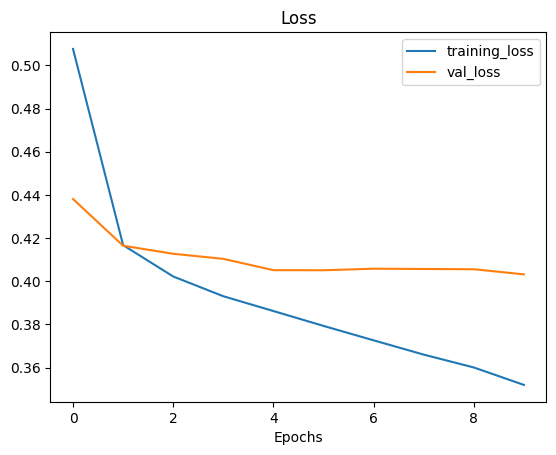

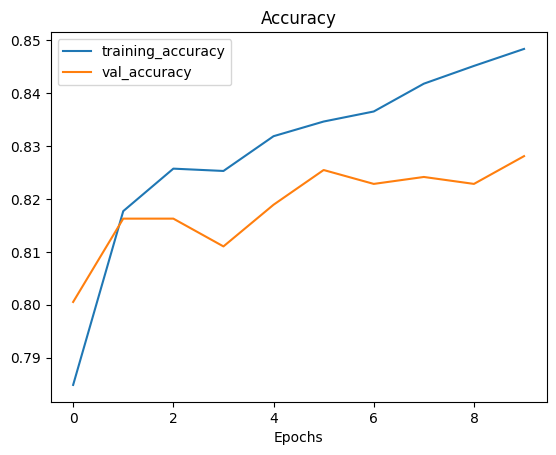

In [90]:
plot_loss_curves(history_6)

## Model 7: TF Hub 10% of training data

In [107]:
#data leakage
# Create subsets of 10% of the training data
# train_10_percent = train_df_shuffled[['text', 'target']].sample(frac=0.1, random_state=42)
# len(train_10_percent)

train_10_percent_split = int(0.1 * len(train_sentences))
train_sentences_10_percent = train_sentences[:train_10_percent_split]
train_labels_10_percent = train_labels[:train_10_percent_split]
len(train_10_percent), len(train_labels_10_percent)

(685, 685)

In [108]:
pd.Series(np.array(train_labels_10_percent)).value_counts()

0    386
1    299
dtype: int64

In [92]:
# train_sentences_10_percent = train_10_percent['text'].to_list()
# train_labels_10_percent = train_10_percent['target'].to_list()
# len(train_sentences_10_percent), len(train_labels_10_percent)

(761, 761)

In [93]:
# Check the nubmer of targets in our subset of data
# train_10_percent['target'].value_counts()

0    413
1    348
Name: target, dtype: int64

In [94]:
train_df_shuffled['target'].value_counts()

0    4342
1    3271
Name: target, dtype: int64

In [104]:
embed = hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder/4",
                       input_shape=[],
                       dtype=tf.string)

model_7 = tf.keras.Sequential([
    embed,
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_7.summary()



Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_1 (KerasLayer)  (None, 512)               256797824 
                                                                 
 dense_11 (Dense)            (None, 64)                32832     
                                                                 
 dense_12 (Dense)            (None, 1)                 65        
                                                                 
Total params: 256830721 (979.73 MB)
Trainable params: 32897 (128.50 KB)
Non-trainable params: 256797824 (979.61 MB)
_________________________________________________________________


In [105]:
model_7.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

In [109]:
history_7 = model_7.fit(train_sentences_10_percent,
                        train_labels_10_percent,
                        epochs=5,
                        validation_data=(val_sentences, val_labels))

Epoch 1/5
22/22 [==============================] - 4s 43ms/step - loss: 0.6746 - accuracy: 0.6891 - val_loss: 0.6503 - val_accuracy: 0.7782
Epoch 2/5
22/22 [==============================] - 0s 22ms/step - loss: 0.6157 - accuracy: 0.8088 - val_loss: 0.5900 - val_accuracy: 0.7861
Epoch 3/5
22/22 [==============================] - 1s 26ms/step - loss: 0.5452 - accuracy: 0.8044 - val_loss: 0.5326 - val_accuracy: 0.7822
Epoch 4/5
22/22 [==============================] - 0s 23ms/step - loss: 0.4855 - accuracy: 0.8161 - val_loss: 0.4924 - val_accuracy: 0.7900
Epoch 5/5
22/22 [==============================] - 1s 25ms/step - loss: 0.4402 - accuracy: 0.8161 - val_loss: 0.4724 - val_accuracy: 0.7887


In [110]:
model_7_pred_probs = model_7.predict(val_sentences)
model_7_preds = tf.squeeze(tf.round(model_7_pred_probs))
model_7_results = evaluations(val_labels, model_7_preds)
model_7_results

24/24 [==============================] - 1s 9ms/step


{'accuracy': 78.87139107611549,
 'precision': 0.7886109166527275,
 'recall': 0.7887139107611548,
 'f1': 0.7880561968219738}